# TP 1 : implémentation des concepts de base sur les graphes

Dans ce TP, l'objectif est d'implémenter les opérations simples sur les graphes orientés.
La représentation choisie pour les graphes est une matrice d'adjacence, qui sera représentée par un tableau de tableau (les noms des sommets sont des entiers et seront numérotés en commençant à 0). Nous considérons que le nombre de sommets du graphe ne pourra pas être modifié une fois le graphe construit.

## Import des modules utiles

In [1]:
# %pip install numpy
import numpy as np

## Définition des fonctions pour l'affichage des graphes (code entièrement donné)

### Installation de graphviz pour pouvoir visualiser les graphes

In [2]:
# %pip install graphviz
import graphviz
graphviz.__version__, graphviz.version()

('0.20.1', (2, 43, 0))

### Création d'une fonction de conversion d'un graphe, défini par une matrice d'adjacence, vers le format graphviz

In [3]:
def creation_graphe_graphviz(g):
    # création d'un graphe orienté
    dot = graphviz.Digraph()

    # ajout des sommets
    for i in range(len(g)):
        dot.node(str(i))

    # ajout des arcs
    for i in range(len(g)):
        for j in range(len(g)):
            if g[i][j] == 1:
                dot.edge(str(i), str(j))

    return dot

## Création et affichage d'un premier graphe orienté


In [4]:
graphe1 = np.array([[0,1,1],
          [1,0,1],
          [1,0,0]])

#### Affichage de la matrice

In [5]:
print(graphe1)

[[0 1 1]
 [1 0 1]
 [1 0 0]]


#### Création du graphe associé, au format graphviz, pour pouvoir faire l'affichage de la représentation sagittale du graphe

In [6]:
gdot1 = creation_graphe_graphviz(graphe1)
#print(gdot1.source)

#### Affichage de la représentation sagittale du graphe

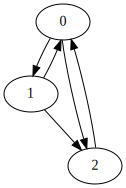

In [7]:
gdot1

## Implémentation des premières fonctions pour manipuler les graphes (cellules de code à compléter)

### Premières définitions

#### `graphe_vide(n)`: fonction qui construit un graphe vide (sans arcs), avec `n` sommets, et qui retourne la matrice d'adjacence correspondante

In [8]:
def graphe_vide(n):
    return np.zeros((n, n))

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


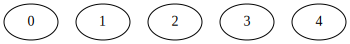

In [9]:
# test de la fonction graphe_vide
graphe2 = graphe_vide(5)
print(graphe2)
gdot2 = creation_graphe_graphviz(graphe2)
gdot2

#### `est_arc(g, i, j)` : fonction qui retourne vrai si l'arc `(i,j)` existe dans le graphe `g`

In [10]:
def est_arc(g, i, j):
    if g[i][j]== 1: return True
    else : return False
    # raise NotImplementedError

In [11]:
# test de la fonction est_arc
print(est_arc(graphe1, 0, 0)) #faux
print(est_arc(graphe1, 0, 1)) #vrai

False
True


#### `ajoute_arc(g, i, j)` : fonction qui ajoute l'arc `(i,j)` au graphe `g`, s'il n'est pas déjà présent

In [12]:
def ajoute_arc(g, i, j):
    if not est_arc(g, i, j):
      g[i][j]=1

    # raise NotImplementedError

False
True


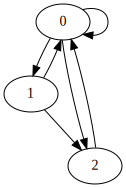

In [13]:
# test de la fonction ajoute_arc
print(est_arc(graphe1, 0, 0)) #faux
ajoute_arc(graphe1, 0, 0)
print(est_arc(graphe1, 0, 0)) #vrai

gdot1 = creation_graphe_graphviz(graphe1)
gdot1

True
True


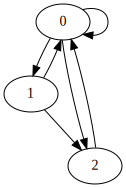

In [14]:
# test de la fonction ajoute_arc
print(est_arc(graphe1, 0, 1)) #vrai
ajoute_arc(graphe1, 0, 1)
print(est_arc(graphe1, 0, 1)) #vrai

gdot1 = creation_graphe_graphviz(graphe1)
gdot1

#### `ote_arc(g, i, j)`: fonction qui ote l'arc `(i,j)` du graphe `g`, s'il était déjà présent

In [15]:
def ote_arc(g, i, j):
    if est_arc(g, i, j):
      g[i][j]=0
    # raise NotImplementedError

True
False


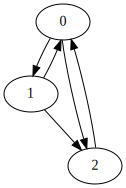

In [16]:
# test de la fonction ote_arc
print(est_arc(graphe1, 0, 0)) #vrai
ote_arc(graphe1, 0, 0)
print(est_arc(graphe1, 0, 0)) #faux

gdot1 = creation_graphe_graphviz(graphe1)
gdot1

False
False


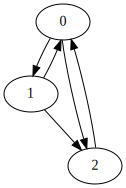

In [17]:
# test de la fonction ote_arc
print(est_arc(graphe1, 1, 1)) #faux
ote_arc(graphe1, 1, 1)
print(est_arc(graphe1, 1, 1)) #faux

gdot1 = creation_graphe_graphviz(graphe1)
gdot1

#### `nb_sommets(g)` : fonction qui retourne le nombre de sommets du graphe `g`

In [18]:
def nb_sommets(g):
    count = len(g)
    return count
    # raise NotImplementedError

In [19]:
# test de la fonction nb_sommets
n = nb_sommets(graphe1)#3 sommets
print("Nombre de sommets :", n)

Nombre de sommets : 3


#### `est_simple(g)` : fonction qui indique si le graphe `g` est simple

In [20]:
def est_simple(g):
    for i in range(len(g)):
      if est_arc(g, i, i): return False # test uniquement la diagonale
    return True
    # raise NotImplementedError

In [21]:
# test de la fonction est_simple
print("Graphe simple ?", est_simple(graphe1))#vrai

Graphe simple ? True


#### `est_complet(g)` : fonction qui indique si le graphe `g` est complet

In [22]:
def est_complet(g):
    # est complet si nbrArcs = nbrSommets**2
    nbrSommets = nb_sommets(g)
    nbrArcs = 0
    for i in range(len(g)-1) :
      for j in range(len(g[i]-1)):
        nbrArcs += 1

    if nbrArcs == nbrSommets**2:
      return True
    return False
    # raise NotImplementedError

In [23]:
# test de la fonction est_complet
print("Graphe complet ?", est_complet(graphe1))#faux

Graphe complet ? False


#### `est_symetrique(g)` : fonction qui indique si le graphe `g` est symétrique

In [24]:
def est_symetrique(g):
  # test si pour chaque liason, il existe la liason dans le sens inverse
  for i in range(len(g)-1) :
      for j in range(len(g[i]-1)):
        if est_arc(g, i, j) != est_arc(g, i, len(g[i])-j-1): return False
  return True
  # raise NotImplementedError

In [25]:
# test de la fonction est_symetrique
print("Graphe symétrique ?", est_symetrique(graphe1))#faux

Graphe symétrique ? False


### Prédécesseurs et successeurs

#### `successeur(g,s1,s2)` : fonction qui retourne vrai si le sommet `s2` est un successeur du sommet `s1`, dans le graphe `g` et faux sinon

In [26]:
def successeur(g,s1,s2):
    if est_arc(g, s1, s2): return True
    return False
    # raise NotImplementedError

In [27]:
# test de la fonction successeur
print("0 successeur du sommet 0 :", successeur(graphe1,0,0))
print("1 successeur du sommet 0 :", successeur(graphe1,0,1))
print("0 successeur du sommet 1 :", successeur(graphe1,1,0))

0 successeur du sommet 0 : False
1 successeur du sommet 0 : True
0 successeur du sommet 1 : True


#### `successeurs(g,s)` : fonction qui retourne un tableau numpy contenant les noms des sommets successeurs du sommet `s`, dans le graphe `g`

In [28]:
def successeurs(g,s):
  listSommets = []
  for j in range(len(g[s])-1):
    if successeur(g, s, j):
      listSommets.append(j)
  return listSommets
  #  raise NotImplementedError

In [29]:
# test de la fonction successeurs
print("Successeurs du sommet 0 :", successeurs(graphe1,0))
print("Successeurs du sommet 1 :", successeurs(graphe1,1))
print("Successeurs du sommet 2 :", successeurs(graphe1,2))

Successeurs du sommet 0 : [1]
Successeurs du sommet 1 : [0]
Successeurs du sommet 2 : [0]


#### `predecesseur(g,s1,s2)` : fonction qui retourne vrai si le sommet `s2` est un prédécesseur du sommet `s1`, dans le graphe `g`, et faux sinon

In [30]:
def predecesseur(g,s1,s2):
  if est_arc(g, s2, s1): return True
  return False
  #raise NotImplementedError

In [31]:
# test de la fonction predecesseur
print("0 prédécesseurs du sommet 0 :", predecesseur(graphe1,0,0))
print("1 prédécesseurs du sommet 0 :", predecesseur(graphe1,1,0))
print("0 prédécesseurs du sommet 1 :", predecesseur(graphe1,0,1))

0 prédécesseurs du sommet 0 : False
1 prédécesseurs du sommet 0 : True
0 prédécesseurs du sommet 1 : True


#### `predecesseurs(g,s)` : fonction qui retourne un tableau numpy contenant les noms des sommets prédécesseurs du sommet `s`, dans le graphe `g`

In [32]:
def predecesseurs(g,s):
    listSommets = []
    for j in range(len(g[s])-1):
      if predecesseur(g, s, j):
        listSommets.append(j)
    return listSommets
    #  raise NotImplementedError

In [33]:
# test de la fonction predecesseurs
print("Prédécesseurs du sommet 0 :", predecesseurs(graphe1,0))
print("Prédécesseurs du sommet 1 :", predecesseurs(graphe1,1))
print("Prédécesseurs du sommet 2 :", predecesseurs(graphe1,2))

Prédécesseurs du sommet 0 : [1]
Prédécesseurs du sommet 1 : [0]
Prédécesseurs du sommet 2 : [0, 1]


### Degrés des sommets

#### `degre_entrant(g, s)` : fonction qui retourne le degré entrant du sommet `s`, dans le graphe `g`

In [34]:
def degre_entrant(g, s):
    nbArc = len(predecesseurs(g, s))
    return nbArc

In [35]:
# test de la fonction degre_entrant
print("degré entrant du sommet 0 :", degre_entrant(graphe1,0))
print("degré entrant du sommet 1 :", degre_entrant(graphe1,1))
print("degré entrant du sommet 2 :", degre_entrant(graphe1,2))

degré entrant du sommet 0 : 1
degré entrant du sommet 1 : 1
degré entrant du sommet 2 : 2


#### `degre_sortant(g, s)` : fonction qui retourne le degré sortant du sommet `s`, dans le graphe `g`

In [36]:
def degre_sortant(g, s):
    nbArc = len(successeurs(g, s))
    return nbArc

In [37]:
# test de la fonction degre_sortant
print("degré sortant du sommet 0 :", degre_sortant(graphe1,0))
print("degré sortant du sommet 1 :", degre_sortant(graphe1,1))
print("degré sortant du sommet 2 :", degre_sortant(graphe1,2))

degré sortant du sommet 0 : 1
degré sortant du sommet 1 : 1
degré sortant du sommet 2 : 1


#### `degre_total(g, s)` : fonction qui retourne le degré total du sommet `s`, dans le graphe `g`

In [38]:
def degre_total(g, s):
    return degre_entrant(g,s) + degre_sortant(g,s)

In [39]:
# test de la fonction degre_total
print("degré total du sommet 0 :", degre_total(graphe1,0))
print("degré total du sommet 1 :", degre_total(graphe1,1))
print("degré total du sommet 2 :", degre_total(graphe1,2))

degré total du sommet 0 : 2
degré total du sommet 1 : 2
degré total du sommet 2 : 3


#### `degres_entrants(g)` : fonction qui retourne les degrés entrants des sommets du graphe `g`, sous la forme d'un tableau numpy

In [59]:
def degres_entrants(g):
    degIn = []
    for i in range(len(g)-1) :
        degIn.append(degre_entrant(g, i))
    return degIn

In [60]:
# test de la fonction degres_entrants
#gdot1 = creation_graphe_graphviz(graphe1)
#gdot1
print(degres_entrants(graphe1))

[1, 1]


#### `degres_sortants(g)` : fonction qui retourne les degrés sortants des sommets du graphe `g`, sous la forme d'un tableau numpy

In [61]:
def degres_sortants(g):
    degOut = []
    for i in range(len(g)-1) :
        degOut.append(degre_sortant(g, i))
    return degOut

In [62]:
# test de la fonction degres_sortants
print(degres_sortants(graphe1))

[1, 1]


#### `degres_totaux(g)` : fonction qui retourne les degrés totaux des sommets du graphe `g`, sous la forme d'un tableau numpy

In [63]:
def degres_totaux(g):
    deg = []
    for i in range(len(g)-1) :
        deg.append(degre_total(g, i))
    return deg

In [64]:
# test de la fonction degres_totaux
print(degres_totaux(graphe1))

[2, 2]


### Sommets source et puits

#### `est_source(g, s)` : fonction qui retourne vrai si le sommet `s` est une source, dans le graphe `g`

In [65]:
def est_source(g, s):
    if len(predecesseurs(g, s))==0: return True
    else : return False

In [67]:
# test de la fonction est_source
print(est_source(graphe1, 0))
print(est_source(graphe1, 1))
print(est_source(graphe1, 2))

False
False
False


#### `est_puits(g, s)` : fonction qui retourne vrai si le sommet `s` est un puits, dans le graphe `g`

In [68]:
def est_puits(g, s):
    if len(successeurs(g, s))==0: return True
    else : return False

In [69]:
# test de la fonction est_puits
print(est_puits(graphe1, 0))
print(est_puits(graphe1, 1))
print(est_puits(graphe1, 2))

False
False
False


## Implémentation des fonctions bonus (cellules de code à compléter)

### Construction de graphes particuliers

#### `graphe_reciproque(g)` : fonction qui retourne la matrice d'adjacence correspondant au graphe réciproque du graphe `g`

In [72]:
def graphe_reciproque(g):
    return np.transpose(g)

[[0 1 1]
 [1 0 0]
 [1 1 0]]


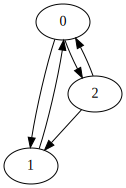

In [79]:
# test de la fonction graphe_reciproque
graphe1_rec = graphe_reciproque(graphe1)
print(graphe1_rec)
gdot1_rec = creation_graphe_graphviz(graphe1_rec)
gdot1_rec

#### `graphe_complementaire(g)` : fonction qui retourne la matrice d'adjacence correspondant au graphe complémentaire du graphe `g`

In [83]:
def graphe_complementaire(g):
  for i in g :
    for j in i :
      if j == 0 : j = 1
      else : j = 0
  return g

[[0 1 1]
 [1 0 1]
 [1 0 0]] 

 [[0 1 1]
 [1 0 0]
 [1 1 0]]


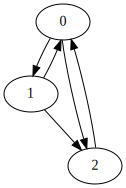

In [84]:
# test de la fonction graphe_complementaire
graphe1_comp = graphe_complementaire(graphe1)
print(graphe1,"\n\n", graphe1_rec)
gdot1_comp = creation_graphe_graphviz(graphe1_comp)
gdot1_comp

#### `graphe_symetrique(g)` : fonction qui retourne la matrice d'adjacence correspondant au graphe symétrique du graphe `g`

In [ ]:
def graphe_symetrique(g):
    raise NotImplementedError

In [ ]:
# test de la fonction graphe_symetrique
graphe1_sym = graphe_symetrique(graphe1)
#print(graphe1_rec)
gdot1_sym = creation_graphe_graphviz(graphe1_sym)
gdot1_sym

### Chemins et circuits

#### `est_chemin(g, ls)` : fonction qui indique si la liste des sommets `ls` correspond à un chemin, dans le graphe `g`

In [ ]:
def est_chemin(g, ls):
    raise NotImplementedError

In [ ]:
# test de la fonction est_chemin
print("Chemin [] ?", est_chemin(graphe1,[]))
print("Chemin [1] ?", est_chemin(graphe1,[1]))
print("Chemin [0, 1] ?", est_chemin(graphe1,[0,1]))
print("Chemin [0, 1, 2] ?", est_chemin(graphe1,[0,1,2]))
print("Chemin [0, 2, 1] ?", est_chemin(graphe1,[0,2,1]))
print("Chemin [0, 1, 2, 2] ?", est_chemin(graphe1,[0,1,2,2]))

#### `est_circuit(g, ls)` : fonction qui indique si la liste des sommets `ls` correspond à un circuit, dans le graphe `g`

In [ ]:
def est_circuit(g, ls):
    raise NotImplementedError

In [ ]:
# test de la fonction est_circuit
print("Circuit [] ?", est_circuit(graphe1,[]))
print("Circuit [1] ?", est_circuit(graphe1,[1]))
print("Circuit [0, 1] ?", est_circuit(graphe1,[0,1]))
print("Circuit [0, 1, 2, 0] ?", est_circuit(graphe1,[0,1,2,0]))
print("Circuit [0, 2, 1, 0] ?", est_circuit(graphe1,[0,2,1,0]))
print("Circuit [0, 1, 2, 2] ?", est_circuit(graphe1,[0,1,2,2]))

#### `est_chemin_elementaire(g, ls)` : fonction qui indique si la liste des sommets `ls` correspond à un chemin élémentaire, dans le graphe `g`

In [ ]:
def est_chemin_elementaire(g, ls):
    raise NotImplementedError

In [ ]:
# test de la fonction est_chemin_elementaire

#### `est_chemin_simple(g, ls)` : fonction qui indique si la liste des sommets `ls` correspond à un chemin simple, dans le graphe `g`

In [ ]:
def est_chemin_simple(g, ls):
    raise NotImplementedError

In [ ]:
# test de la fonction est_chemin_simple

#### `est_circuit_elementaire(g, ls)` : fonction qui indique si la liste des sommets `ls` correspond à un circuit élémentaire, dans le graphe `g`

In [ ]:
def est_circuit_elementaire(g, ls):
    raise NotImplementedError

In [ ]:
# test de la fonction est_circuit_elementaire

#### `est_circuit_simple(g, ls)` : fonction qui indique si la liste des sommets `ls` correspond à un circuit simple, dans le graphe `g`

In [ ]:
def est_circuit_simple(g, ls):
    raise NotImplementedError

In [ ]:
#test de la fonction est_circuit_simple

### Sous-graphes

#### `est_sous_graphe(g1, g2)` : fonction qui retourne vrai si le graphe `g2` est un sous-graphe du graphe `g1` (`g1` et `g2` doivent avoir le même nombre de sommets)

In [ ]:
def est_sous_graphe(g1, g2):
    raise NotImplementedError

In [ ]:
# test de la fonction est_sous_graphe

#### `sous_graphe(g, ls)` : fonction qui retourne le sous-graphe induit par la liste de sommets donnée (le sous-graphe induit n'aura plus la même numérotation des sommets, s'il en a moins que `g`)

In [ ]:
def sous_graphe(g, ls):
    raise NotImplementedError

In [ ]:
# test de la fonction sous_graphe